In [1]:
# Submission using Random Forests
# Kaggle score: 0.76077

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
def extractFeatures(df):
    # Split data
    features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']
    X = df.loc[:, features]

    # Fill missing age with mean
    X.Age.fillna(X.Age.mean(), inplace=True)
    X.Fare.fillna(X.Fare.mean(), inplace=True)
    
    # Convert sex coloumn str dtype to binary
    from sklearn import preprocessing
    LE = preprocessing.LabelEncoder()
    X.Sex = LE.fit_transform(X.Sex)
    
    # Remove missing data from cabin 
    def clean_cabin(x):
        try:
            return x[0]
        except TypeError:
            return "None"
    X.Cabin = X.Cabin.apply(clean_cabin)
    
    # Transform categorical data into unique binary columns
    cv = ['Sex', 'Cabin', 'Embarked']
    for variable in cv:
        X[variable].fillna("Missing", inplace=True)
        dummies = pd.get_dummies(X[variable], prefix=variable)
        X = pd.concat([X, dummies], axis=1)
        X.drop([variable], axis=1, inplace=True)
    
    return X

In [3]:
X = extractFeatures(train)
y = train.Survived

# Train RF model
model = RandomForestClassifier(100, n_jobs=-1)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

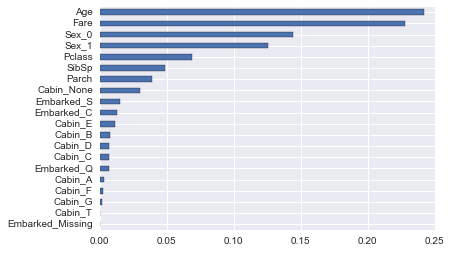

In [7]:
# Display feature importance
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=0)
feature_importance.sort_values(ascending=1).plot(kind='barh')
plt.show()

In [5]:
# Compute predicitons using RF model
X_new = extractFeatures(test)

# Fix missing output columns
cols = list(set(X.columns)^set(X_new.columns))
for col in cols:
    X_new[col] = 0

submission = model.predict(X_new)

# Output CSV for Kaggle submission
pd.DataFrame({'PassengerId': test.PassengerId, 'Survived':submission.round(0)}).set_index('PassengerId').to_csv('sub.csv')

In [6]:
# Check prediction with alternate RF submisson
comp = pd.read_csv('sub.csv')
comp['Survived2'] = pd.read_csv('r_rf_csv.csv').Survived
comp.head(20)

,PassengerId,Survived,Survived2
0,892,0,0
1,893,0,0
2,894,0,0
3,895,0,0
4,896,0,0
5,897,0,0
6,898,1,0
7,899,0,0
8,900,1,1
9,901,0,0
